In [11]:
#Import libraries
import os #Operating System interactions
import pandas as pd #Panel Data - for working with tabular data
import geopandas as gp # for GIS analysis or Geo Processing
from shapely.geometry import Point #Allows you to vreate gpkg files from xy data
import numpy as np #Numerical Calc
from matplotlib import pyplot as plt 
import matplotlib_map_utils as mapu #Alias of Map Utils like 'plt' for plot. For North Arrow.

In [12]:
#Set the directories
path = 'D:\\TEXAS BRIDGE DATA'
os.chdir(path) #Change the directory to that path

In [13]:
fname1 = 'NEWTX23.csv'
fname2 = 'COUNTY.gpkg'
#Read the geopackage file (both PW and CONUS contents) into an object called pw & conus. "gp." Tells us that we want the geopackage fuction in the Geopandas library.
pw = gp.read_file(fname1)
conus = gp.read_file(fname2)
pw.head() #With parenthesis it's a method, without it's a feature. Head = top 5 values for display, tail = bottom 5 values for display.

,field_1,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,...,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA
0,9,48,000021594-62610,1,6,0,0,0,2,203,...,Y,8,15,2041,,Y,63,G,8,127.98
1,17,48,1E+13,1,6,0,217,0,17,407,...,Y,5,150,2043,0.0,Y,64,G,8,144.57
2,54,48,1.06001E+13,1,3,1,19,0,1,119,...,Y,8,4740,2033,,N,48,F,5,109.88
3,55,48,1.06001E+13,1,3,1,19,0,1,119,...,Y,8,3500,2030,,N,48,G,7,1279.6
4,56,48,1.06001E+13,1,3,1,128,0,1,119,...,Y,8,150,2033,,N,48,G,7,80.4


In [ ]:
type(pw) # Tells us the object class

In [14]:
import pandas as pd

# Function to convert DMS to decimal degrees, with error handling
def dms_to_dd(dms):
    if isinstance(dms, str):  # Only process if the value is a string
        # Split the string into degrees, minutes, and seconds
        parts = dms.split()
        degrees = float(parts[0])
        minutes = float(parts[1])
        seconds = float(parts[2])

        # Convert to decimal degrees
        dd = degrees + minutes / 60 + seconds / 360000

        # If the degrees value is negative, make sure to return a negative decimal
        if degrees < 0:
            dd = -abs(dd)
        
        return dd
    else:
        # Return the value directly if it's not a string (e.g., already in decimal)
        return dms

# Load the CSV file
fname = 'NEWTX23.csv'
df = pd.read_csv(fname)

# Convert LAT_016 and LONG_017 from DMS to decimal degrees (if they are in DMS format)
df['LAT_016'] = df['LAT_016'].apply(dms_to_dd)
df['LONG_017'] = df['LONG_017'].apply(dms_to_dd)

# Save the updated DataFrame to a new CSV file with the specified name
output_fname = 'NEWTX23.csv'
df.to_csv(output_fname, index=False)

print(f"LAT_016 and LONG_017 converted to decimal degrees and saved to {output_fname}")


C:\Users\Prabin-PC\AppData\Local\Temp\ipykernel_23860\553332383.py:26: DtypeWarning: Columns (6,76,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fname)


LAT_016 and LONG_017 converted to decimal degrees and saved to NEWTX23.csv


In [16]:
import geopandas as gp

fname1 = 'NEWTX23.csv'
fname2 = 'COUNTY.gpkg'
output_gpkg = 'output_reprojected.gpkg'

# Read the files into objects
pw = gp.read_file(fname1)
conus = gp.read_file(fname2)

# Display the top 5 rows of pw
pw.head()

# Reproject conus GeoDataFrame to WGS 84 (EPSG:4326)
conus = conus.to_crs(epsg=4326)

# Save the reprojected GeoDataFrame to a new GPKG file
conus.to_file(output_gpkg, driver="GPKG")

print("CRS changed to WGS 84 and saved to:", output_gpkg)


CRS changed to WGS 84 and saved to: output_reprojected.gpkg


In [17]:
import pandas as pd
import geopandas as gpd

# Load the CSV file into a DataFrame
fname = 'NEWTX23.csv'
df = pd.read_csv(fname)

# Assuming your latitude and longitude columns are 'LAT' and 'LONG', create a GeoDataFrame
geometry = gpd.points_from_xy(df['LONG_017'], df['LAT_016'])  # Replace with correct column names
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the original CRS if known (for example, WGS 84)
gdf.set_crs(epsg=4326, inplace=True)  # WGS 84 is EPSG:4326

# Convert to NAD83 (EPSG:4269)
gdf_nad83 = gdf.to_crs(epsg=4269)

# Save the updated GeoDataFrame to a new file if needed
output_fname = 'NEWTX23.gpkg'
gdf_nad83.to_file(output_fname, driver='GPKG')

print(f"Data transformed to NAD83 and saved to {output_fname}")


C:\Users\Prabin-PC\AppData\Local\Temp\ipykernel_23860\2893751708.py:6: DtypeWarning: Columns (6,76,97,103) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fname)


Data transformed to NAD83 and saved to NEWTX23.gpkg


In [9]:
import os

# List files in the current directory
print(os.listdir('.'))



['COUNTY.gpkg', 'NEWTX22.csv', 'NEWTX22csv', 'NEWTX23.csv', 'NEWTX23.gpkg', 'NEWTX23_nad83.gpkg', 'NEWTX23_updated.csv', 'output_data.gpkg', 'output_reprojected.gpkg', 'selected_columns_data.csv', 'selected_columns_data2.csv', 'selected_data.csv', 'TEXAS23DATA.csv', 'TEXAS23DATA_nad83.gpkg', 'TX22.csv', 'TX23.csv']


ValueError: aspect must be finite and positive 

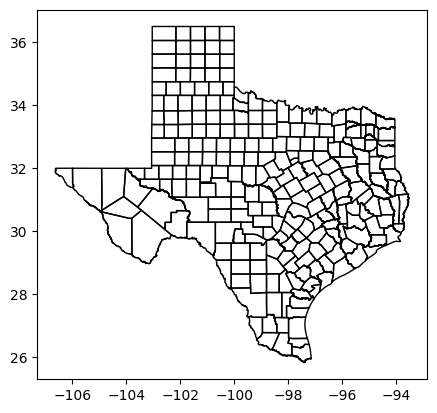

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoPackage file into a GeoDataFrame
fname = 'TEXAS23DATA_nad83.gpkg'
pw = gpd.read_file(fname)

fig = plt.figure()
ax1 = fig.add_subplot() #we have multiple layers being added, so when we have to plot multiple layers on the plot, we need to make sure all of them are plotted on the same axis.
conus.plot (facecolor='none', edgecolor='black', ax=ax1) #ax=ax1 - overlaping axis. 
pw.plot(ax=ax1, color='magenta', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (NAD 83)')
ax1.set_ylabel('Latitude (NAD 83)')
plt.grid()
plt.title('Bridges that were surveyed in 2023 but not in 2022')
plt.show()

   
